<a href="https://colab.research.google.com/github/josuelopes512/naive-bayes/blob/master/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from random import choice

In [145]:
class Bayes_Classifier:
    def __init__(self) -> None:
      pass
    
    def __init__(self, *args, **kwargs):
      self.carrega_tabela("naive_bayes_classificador.csv")
      self.outlook = self.probability_select_class(kwargs.get('outlook', args[0]), 'Target', kwargs.get("play_golf", args[4]))[1]
      self.temp = self.probability_select_class(kwargs.get('temp', args[1]), 'Target', kwargs.get("play_golf", args[4]))[1]
      self.humidity = self.probability_select_class(kwargs.get('humidity', args[2]), 'Target', kwargs.get("play_golf", args[4]))[1]
      self.windy = self.probability_select_class(kwargs.get('windy', args[3]), 'Target', kwargs.get("play_golf", args[4]))[1]
      self.play_golf = self.calculate_prior('Target')[0][kwargs.get("play_golf", args[4])]


    # def __init__(self, outlook, temp, humidity, windy, play_golf):
    #   self.carrega_tabela("naive_bayes_classificador.csv")
    #   self.outlook = self.probability_select_class(outlook, 'Target', play_golf)[1]
    #   self.temp = self.probability_select_class(temp, 'Target', play_golf)[1]
    #   self.humidity = self.probability_select_class(humidity, 'Target', play_golf)[1]
    #   self.windy = self.probability_select_class(windy, 'Target', play_golf)[1]
    #   self.play_golf = self.calculate_prior('Target')[0][play_golf]


    def carrega_tabela(self, tabela):
      self.csv = pd.read_csv(tabela, sep=',')

    def view_table(self):
      return self.csv
    
    def probability_select_class(self, label, prob_target, value_target):
      tabela = self.csv
      prob_nome_coluna = None
      for i in list(tabela.columns):
        if label in sorted(list(tabela[i].unique())):
          prob_nome_coluna = i
      tabelax = tabela[tabela[prob_nome_coluna]==label]
      k = tabelax[prob_target]
      x = tabela[tabela[prob_target]==value_target]
      calc = len(tabelax[k==value_target])/len(x) if len(tabelax[k==value_target]) != 0 else (len(tabelax[k==value_target]) + 1)/(len(x) + 3)
      return (tabelax, calc, len(tabelax[k==value_target]), len(x))

    def calculate_prior(self, Y):
      tabela = self.csv
      classes = sorted(list(tabela[Y].unique()))
      new_dic = dict()
      for i in classes:
        new_dic.update({
            i: len(tabela[tabela[Y]==i])/len(tabela)
      })
      return new_dic, tabela
    
    def result_probability(self):
      # print("Genero", self.outlook)
      # print("Idade", self.temp)
      # print("Escolaridade", self.humidity)
      # print("Profissao", self.windy)
      # print("Target", self.play_golf)

      return (self.outlook*self.temp*self.humidity*self.windy*self.play_golf)


In [209]:
class Calc_prob:
    def __init__(self, genero, idade, escolaridade, profissao):
        # self.bayes_classify_yes = Bayes_Classifier(genero, idade, escolaridade, profissao, 1)
        self.bayes_classify_no = Bayes_Classifier(genero, idade, escolaridade, profissao, 0)
        # self.result_prob_yes = self.bayes_classify_yes.result_probability()
        # self.result_prob_no = self.bayes_classify_no.result_probability()
        self.table = self.bayes_classify_no.view_table()
        # self.final_probabilty = {
        #     "YES": self.calc_prob(self.result_prob_yes, self.result_prob_no), 
        #     "NO" : self.calc_prob(self.result_prob_no, self.result_prob_yes)
        # }
        self.lists = self.sorted_list()

    def calc_prob(self, a, b):
        return a/(a+b)
    
    def calc_probability_predict(self, genero, idade, escolaridade, profissao):
        bayes_yes = Bayes_Classifier(genero, idade, escolaridade, profissao, 1).result_probability()
        bayes_no = Bayes_Classifier(genero, idade, escolaridade, profissao, 0).result_probability()
        result = {
            1 : self.calc_prob(bayes_yes, bayes_no), 
            0 : self.calc_prob(bayes_no, bayes_yes)
        }
        print(result)

        # k = {0: result[0]} if result[0] > result[1] else {1: result[1]}

        return 0 if result[0] > result[1] else 1


    def sorted_list(self):
        k = dict()
        for i in list(self.table.columns):
            k.update({i: []})
            for j in sorted(list(self.table[i].unique())):
                k[i].append(j)
        return k
    
    def rand_values_reals(self):
        x = {0: [], 1: [], 'targets': []}
        count = 0
        while count < 200:
            a = self.table.loc[choice([i for i in range(len(self.table.index))])]
            xk = []
            for i in list(self.table.columns):
                xk.append(a[i])
            b = Bayes_Classifier(*xk).result_probability()
            x[xk[-1]].append(b)
            x['targets'].append(xk[-1])
            count +=1
        return x
    
    # def prob_finally(self, x):
    #     tamanho = len(x)


    #     self.final_probabilty = {
    #         # "1": self.calc_prob(self.result_prob_yes, self.result_prob_no), 
    #         # "0" : self.calc_prob(self.result_prob_no, self.result_prob_yes)
    #     }
    #     for i in self.lists['Target']:
    #         self.final_probabilty.update(i: self.calc_prob(x[0], x[1]))



    def rand_probability_predict(self):
        x = {0: [], 1: [], 'targets': []}
        cont = 0
        while cont < 200:
            genero = choice(self.lists['Genero'])
            idade = choice(self.lists['Idade'])
            escolaridade = choice(self.lists['Escolaridade'])
            profissao = choice(self.lists['Profissao'])
            print(genero, idade, escolaridade, profissao)
            # target = choice(self.lists['Target'])

            # fd = []
            # for i in self.lists['Target']:
                # self.calc_probability_predict()
                # cx = Bayes_Classifier(genero, idade, escolaridade, profissao, i).result_probability()
                # fd.append(cx)
            # k = Bayes_Classifier(genero, idade, escolaridade, profissao, target).result_probability()
            k = self.calc_probability_predict(genero, idade, escolaridade, profissao)


            # for zx, _ in k.items():
            #     x[zx].append(k[zx])
            #     x['targets'].append(zx)


            x[k].append(k)
            x['targets'].append(k)
            cont += 1
        # print(x)
        return x

    def get_confusion_matrix(self):
        reais = self.rand_values_reals()['targets']
        preditos = self.rand_probability_predict()['targets']
        labels = list(self.table['Target'].unique())
        # print(reais, preditos, labels)

        # não implementado
        if len(labels) > 2:
            return None

        if len(reais) != len(preditos):
            return None
        
        # considerando a primeira classe como a positiva, e a segunda a negativa
        true_class = labels[0]
        negative_class = labels[1]

        # valores preditos corretamente
        tp = 0
        tn = 0
        
        # valores preditos incorretamente
        fp = 0
        fn = 0
        
        for (indice, v_real) in enumerate(reais):
            v_predito = preditos[indice]

            # se trata de um valor real da classe positiva
            if v_real == true_class:
                tp += 1 if v_predito == v_real else 0
                fp += 1 if v_predito != v_real else 0
            else:
                tn += 1 if v_predito == v_real else 0
                fn += 1 if v_predito != v_real else 0
        
        return np.array([
            # valores da classe positiva
            [ tp, fp ],
            # valores da classe negativa
            [ fn, tn ]
        ])

In [210]:
k = Calc_prob("F","a - Ate 25 anos","Fundamental","b")
x = k.get_confusion_matrix()
# print(x)


# l = k.rand_probability_predict()
# # print(l['targets'])

# x = k.rand_values_reals()
# # print(x['targets'])

# print(k.get_confusion_matrix(reais=x['targets'], preditos=l['targets'], labels=[1,0]))
# a = k.get_confusion_matrix(reais=x['targets'], preditos=l['targets'], labels=[1,0])

F c - 36 a 45 anos Pos-graduacao c
{1: 0.9364494105359233, 0: 0.06355058946407674}
M c - 36 a 45 anos Superior e
{1: 0.9548524714900523, 0: 0.04514752850994772}
M c - 36 a 45 anos Medio b
{1: 0.8191989960830149, 0: 0.1808010039169851}
F c - 36 a 45 anos Superior d
{1: 0.9490443962857535, 0: 0.05095560371424653}
F e - Mais 56 anos Superior b
{1: 0.9634589082863096, 0: 0.03654109171369032}
M d - 46 a 55 anos Superior c
{1: 0.9610211246845328, 0: 0.03897887531546727}
F a - Ate 25 anos Pos-graduacao b
{1: 0.7029938298443964, 0: 0.29700617015560354}
F c - 36 a 45 anos Pos-graduacao c
{1: 0.9364494105359233, 0: 0.06355058946407674}
F b - 26 a 35 anos Fundamental e
{1: 0.955501548331498, 0: 0.044498451668501984}
M a - Ate 25 anos Superior e
{1: 0.8695661902791673, 0: 0.1304338097208327}
M a - Ate 25 anos Pos-graduacao c
{1: 0.7627488772464324, 0: 0.23725112275356763}
M a - Ate 25 anos Fundamental b
{1: 0.5374326232186404, 0: 0.46256737678135956}
F d - 46 a 55 anos Superior d
{1: 0.98215184280

<AxesSubplot:>

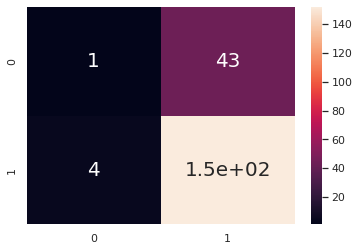

In [207]:
df = pd.DataFrame(x, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df, annot=True,annot_kws={"size": 20})

Index(['Genero', 'Idade', 'Escolaridade', 'Profissao', 'Target'], dtype='object')
AxesSubplot(0.125,0.125;0.775x0.755)


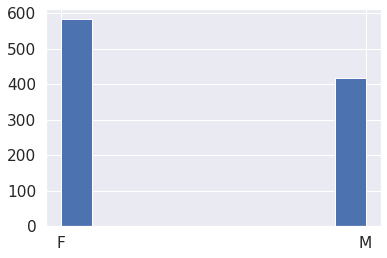

In [159]:
print(k.table.columns)
print(k.table['Genero'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


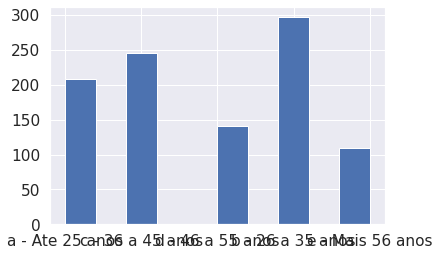

In [161]:
print(k.table['Idade'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


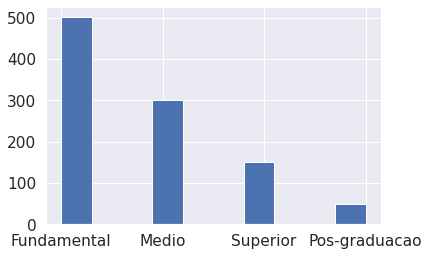

In [160]:
print(k.table['Escolaridade'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


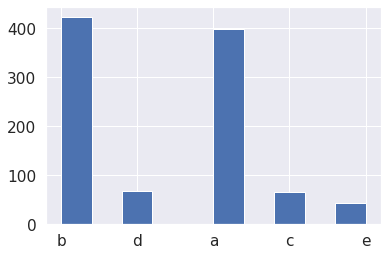

In [162]:
print(k.table['Profissao'].hist())